# SMA, EMA 
### Simple Moving Average vs Exponential Moving Averages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nifty.csv", parse_dates=["date"], index_col="date")
df.head()

,open,high,low,close
date,,,,
2010-01-04,5201,5238,5167,5232
2010-01-05,5277,5288,5242,5278
2010-01-06,5278,5311,5260,5282
2010-01-07,5282,5303,5245,5263
2010-01-08,5264,5277,5235,5245


In [3]:
df.drop('open',axis='columns', inplace=True)
df.drop('high',axis='columns', inplace=True)
df.drop('low',axis='columns', inplace=True)
df.head()

,close
date,
2010-01-04,5232
2010-01-05,5278
2010-01-06,5282
2010-01-07,5263
2010-01-08,5245


In [4]:
# Simple Moving Average
df["SMA"] = df['close'].rolling(26, min_periods=1).mean()
# Exponential Moving Average Slow
df["Slow_EMA"] = df['close'].ewm(span=26, adjust=False).mean()
# Exponential Moving Average Fast
df["Fast_EMA"] = df['close'].ewm(span=12, adjust=False).mean()
df

,close,SMA,Slow_EMA,Fast_EMA
date,,,,
2010-01-04,5232,5232.000000,5232.000000,5232.000000
2010-01-05,5278,5255.000000,5235.407407,5239.076923
2010-01-06,5282,5264.000000,5238.858711,5245.680473
2010-01-07,5263,5263.750000,5240.646954,5248.345016
2010-01-08,5245,5260.000000,5240.969402,5247.830398
...,...,...,...,...
2022-07-13,15967,15837.461538,15970.932531,15972.165173
2022-07-14,15939,15821.423077,15968.567158,15967.062839
2022-07-15,16049,15804.923077,15974.525147,15979.668556


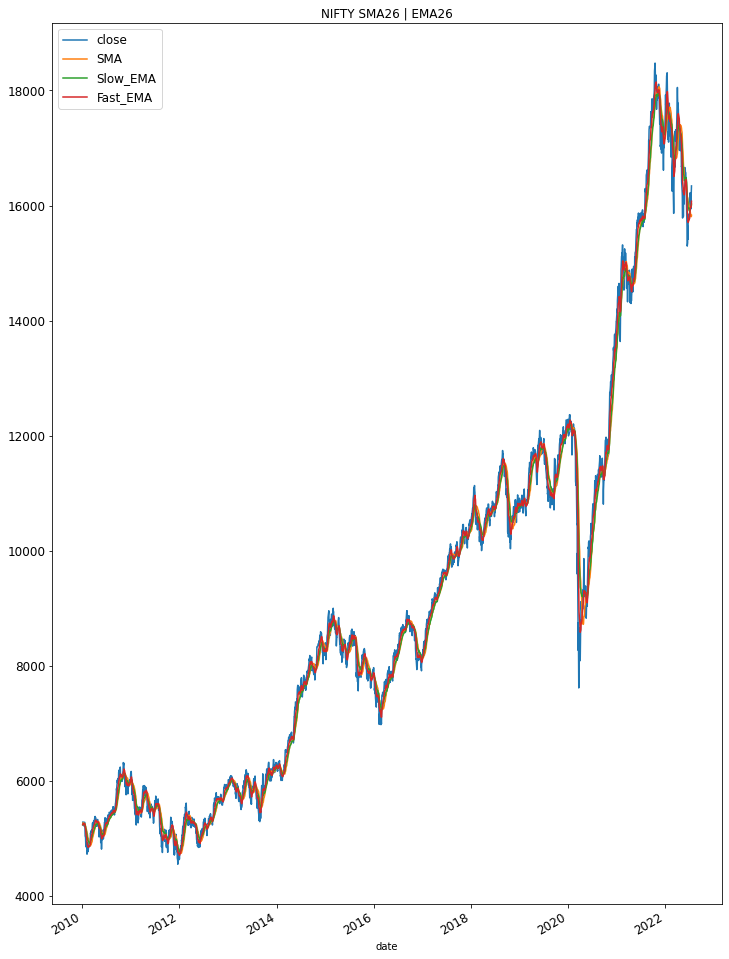

In [5]:
df.dropna(inplace=True)
df.plot(figsize=(12,18), title="NIFTY SMA{} | EMA{}".format(26, 26), fontsize=12)
plt.legend(fontsize=12)
plt.show()

Filter Year 2020

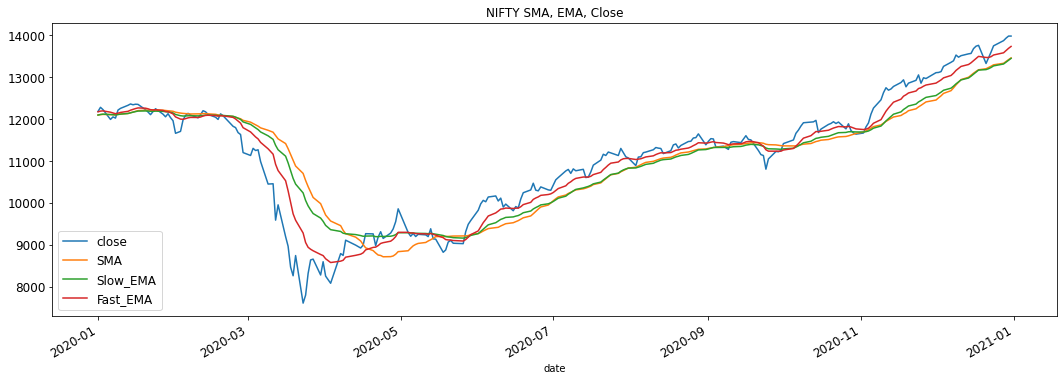

In [6]:
df.loc["2020"].plot(figsize=(18,6), title="NIFTY SMA, EMA, Close", fontsize=12)
plt.legend(fontsize=12)
plt.show()


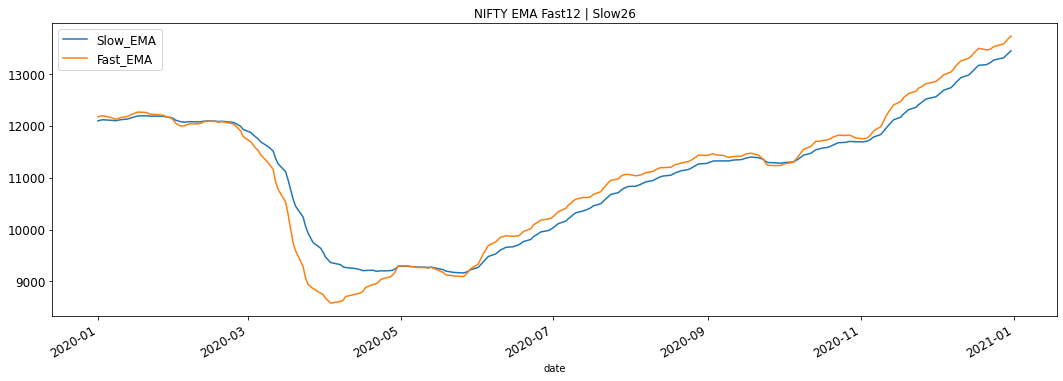

In [7]:
df[["Slow_EMA", "Fast_EMA"]].loc["2020"].plot(figsize=(18,6), title="NIFTY EMA Fast{} | Slow{}".format(12, 26), fontsize=12)
plt.legend(fontsize=12)
plt.show()
